### Python code for Advanced Statistics, homework 1, due Sun 12 Jan 23:59
#### Yoni Schirris, 12211508

### Question 3: Illustrate the validity of the Central Limit Theorem


##### a) Plot the PMF of the Poisson distribution for $\lambda = 1000$ together with the PDF of the normal distribution with the same mean and variance (over the range $700-1300$) \[in both linear and log scale\]. 

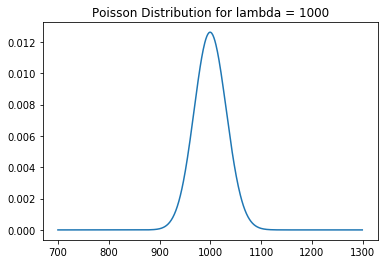

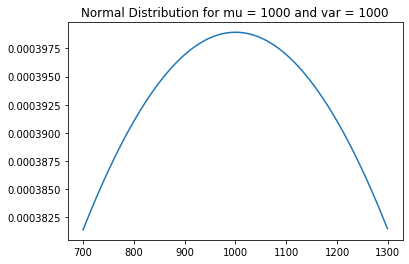

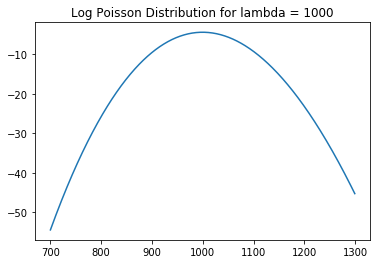

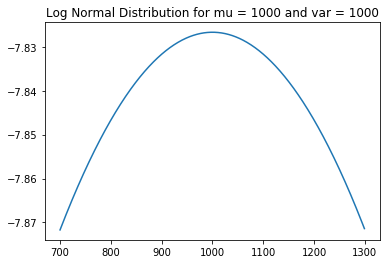

In [7]:
import math
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np

LAMBDA = 1000


# mean is LAMBDA
gauss_mu = LAMBDA
# variance is LAMBDA
gauss_var = LAMBDA

ks = [i for i in range(700,1300)]
pois = scipy.stats.poisson.pmf(ks, LAMBDA)
gauss = scipy.stats.norm.pdf(ks,gauss_mu,gauss_var)

pois_log = [math.log(el) for el in pois]
gauss_log = [math.log(el) for el in gauss]

plt.plot(ks, pois)
plt.title(f'Poisson Distribution for lambda = {LAMBDA}')

plt.show()

plt.plot(ks, gauss)
plt.title(f'Normal Distribution for mu = {gauss_mu} and var = {gauss_var}')

plt.show()


plt.plot(ks, pois_log)
plt.title(f'Log Poisson Distribution for lambda = {LAMBDA}')
plt.show()

plt.plot(ks, gauss_log)
plt.title(f'Log Normal Distribution for mu = {gauss_mu} and var = {gauss_var}')
plt.show()





##### b) Describe with minimum 20 words similarities and differences between the functions when you plot them in linear scale and in log scale.

We clearly see that the mean is the same, as the peak is at 1000.

However, we see that, even though the standard deviation is the same, the values are very differently distributed. This can be seen from several facts.
1. The peak of the Poisson distribution has a much higher probability of ~0.012, while the Gaussian's peak has a probability of 0.003975, meaning the probability mass is spead through the rest of the values
2. This can also be clearly seen from the plot, where the Poisson distribution is much more 'peaked', and the Gaussian distrbiution is much less 'peaked'

##### c) Quantify your results by findings by integrating over the tail of the distribution in an appropriate range of your choice.

In [8]:
first_ks = [i for i in range(0,700)]
first_pois = scipy.stats.poisson.pmf(first_ks, LAMBDA)
first_gauss = scipy.stats.norm.pdf(first_ks,gauss_mu,gauss_var)

sum_pois = sum(first_pois)
sum_gauss = sum(first_gauss)

print(f'The Integral of the poisson distribution from 0 to 700 is {sum_pois}')
print(f'The Integral of the Gaussian distribution from 0 to 700 is {sum_gauss}')



The Integral of the poisson distribution from 0 to 700 is 4.837272987345953e-24
The Integral of the Gaussian distribution from 0 to 700 is 0.2233636047045876


From the above we can see that the integral of 0 to 700 is much higher for the Gaussian distribution than it is for the Poisson distribution. This means that the probability of values is much more widely distributed, and not as peaked around the mean as the Poisson is.